In [1]:
import xgi

# Create random hypergraph
This recipe allows you to create a random hypergraph. It then shows you how to print a short summary of the hypergraph. 

In [2]:
N = 50 # number of nodes
ps = [0.5, 0.2, 0.1] # probabilities of edges of each order

H = xgi.random_hypergraph(N, ps)

print(H)

Unnamed Hypergraph with 50 nodes and 27412 hyperedges


# Clean-up
This recipe shows you how to remove singletons, isolated nodes, multiedges from your hypergraph dataset, this is achieved with the `cleaup` function that also relabels your nodes and edges with integer labels.

In [3]:
H_enron = xgi.load_xgi_data("email-enron")
print(H_enron)

Hypergraph named email-Enron with 148 nodes and 10885 hyperedges


In [4]:
H_enron.cleanup()
print(H_enron)

Hypergraph named email-Enron with 143 nodes and 1459 hyperedges


# Add two hypergraphs
This recipe allows you to add two hypergraphs. This is done by merging the two hypergraphs and then removing the duplicate instances of edges.

In [5]:
H1 = xgi.Hypergraph([[1,2,3],[3,4]])
H2 = xgi.Hypergraph([[1,2],[3,4],[4,5,6]])
# create an hypergraph by merging H1 and H2
H_res = H1 << H2
# remove duplicated edges
H_res.merge_duplicate_edges()
# print the nodes and edges in order to see that everything is correct
print(H_res.nodes)
print(H_res.edges.members())

[1, 2, 3, 4, 5, 6]
[{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}]


# Filterby
This recipe shows you how to filter nodes and edges of a hypergraph based on the values of some statistics.

In [6]:
H = xgi.Hypergraph([{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}])
# filter the nodes of degree 2 and print them
print(H.nodes.filterby("degree", 2))
# filter the edges of size 2 and print them
print(H.edges.filterby("size", 2).members())

[1, 2, 3, 4]
[{1, 2}, {3, 4}]


# Plot a hypergraph showing one order only
This recipe shows you how to plot a hypergraph showing only the edges of a certain order.

In [7]:
H = xgi.Hypergraph([{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}])
pos = xgi.barycenter_spring_layout(H, seed=1)

(<Axes: >, <matplotlib.collections.PathCollection at 0x7f8ea923e190>)

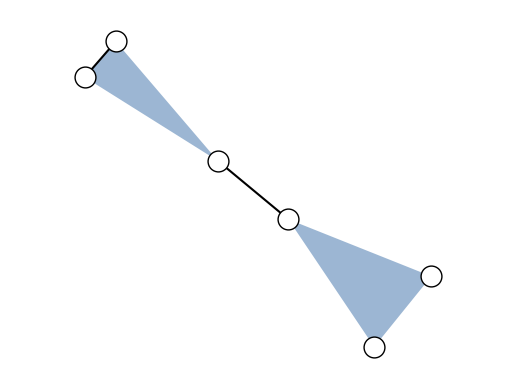

In [8]:
# plot it with all orders
xgi.draw(H, pos)

(<Axes: >, <matplotlib.collections.PathCollection at 0x7f8ea923e970>)

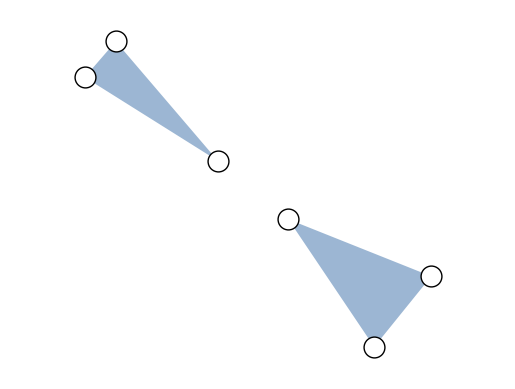

In [9]:
# plot only edges of order 2
H_order_2 = xgi.subhypergraph(H, edges=H.edges.filterby("order", 2))
xgi.draw(H_order_2, pos=pos)


# Plot with stats
This recipe shows you how use the statistics of a hypergraph when plotting it. In this case we modify the size of the nodes according to their degree.

(<Axes: >, <matplotlib.collections.PathCollection at 0x7f8e80339760>)

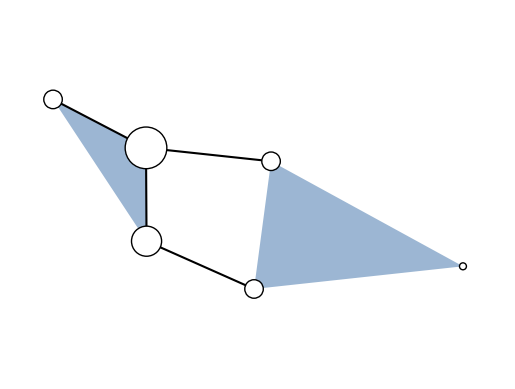

In [10]:
H = xgi.Hypergraph([{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}, {1,5}, {1,3}])
pos = xgi.barycenter_spring_layout(H, seed=1)
# plot with node size corresponding to the degree
xgi.draw(H, pos, node_size=H.nodes.degree)